## IMPORTING LIBRARIES

In [13]:
''' Some of the following steps requires to save and open dataframe, the command line to do it is allready on the code
but need to be activated. '''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import gffutils as gf

import openpyxl
import os
import glob
import sys

from natsort import natsorted
from tqdm import tqdm
from collections import OrderedDict

# geopandas works with 3.9.12 Python environment

## ORDERED DICTIONARY BY MAGS

Creare un ordered dictionary, usarlo per estrarre informazioni riguardo le enzyme classes di ciascun MAGs.

In [21]:
''' Ordered dictionary by MAGs. We want to extract from the .tsv tables information about the Enzyme
class and we also want only the information about the 529 MAGs of interest (TOAvsSTAT will be used to "filter" all 
the .tsv tables). The first step is to create list containing all the information of interest and all the 
path to the elements that will be used after. '''

path = "C:\\Users\\a_lon\\Desktop\\IISEM\\Bioinf&DataScience\\DATASETS\\"     # path to the directory with files
TOAvsSTAT = pd.read_csv(path + 'TOAvsSTAT.csv')                               # file da cui iniziare
names = TOAvsSTAT['BINID'].values                                             # to get the information about the MAGs of interest         
ll = os.listdir(path)                                                         # to get a list of elements at the given 'path'
subpath = path + ll[4] + "\\"                                                 # new path to the directory with the .tsv files (EC informations)
mdict = OrderedDict()                                                         # create the ordered dictionary
fl = natsorted(list(os.listdir(subpath)))                                     # sort .tsv files “naturally” 
fl = [f for f in fl if f.split(".")[0] in names]                              # to extract e connect file_list to the .tsv files 


''' fl is now filled with all the .tsv file, over these files we will run our for loop to extract from fl the information
about our 529 MAGs in the TOAvsSTAT table. (the ec elements are a string and Nan). Defined prokka as our list of elements 
about the 529 MAGs, at the end we can define some operation to mainly check if everything is working properly, but also 
some consideration could be done. '''

for i in tqdm(range(len(fl))):                                                # tqdm is implemented to see the progressing operations
    pth = subpath + fl[i]                                                     # to iterate over all the elements (.tsv) at the fl (COSA?)
    df = pd.read_csv(pth, sep='\t')                                           # to open all the .tsv files 
    ec_prokka = df['EC_number_prokka'].values                                 # to (ASSIGN?) the position of Enzyme Class in the .tsv files
    station = TOAvsSTAT.iloc[i].values[1:]                                    # where to find information about stations
    prokka = []                                                               # this is the empty list in which we will add the elements at the end of the for loop
    for ec in ec_prokka:                                                      # for loop where ec is the enzyme class elements of the selected column in .tsv files
        if isinstance (ec, str):                                              # if ec is a str go on
                    s_ec = []                                                 # initialize an empty list
                    ec = ec.split('.')                                        # split ec in a list of strings with separation at '.'
                    for e in ec:                                              # for every element in the list
                        if e.isnumeric():                                     # if it is a str with int
                            s_ec.append(e)                                    # put that int in s_ec
                        else:
                            s_ec.append(str(0))                               # if it is not an int (nan) put a str 0
                    u_ec = '.'.join(s_ec)                                     
                    prokka.append(u_ec)                                       # append() add all the elements that came out (are true?) from the for list
    
    
    u_prokka, u_counts = np.unique(prokka, return_counts=True)                # np.unique() returns the sorted unique elements of an array.                  
    mdict[i] = {"TOA": fl[i].split('-')[-1].split(".")[0], 
                "prokka": u_prokka , 
                "prokka_freq": np.round(100 *  u_counts / np.sum(u_counts), 1), 
                "station_occurence": station}                           

    
first = mdict[0]                                                              # to select the first MAG of the dictionary
print(fl[0])                                                                  # to show the name of the first MAG
print(first['prokka'])                                                        # to show the enzyme classes associated to the first MAG
print(first['prokka_freq'])                                                   # just a statistical preview of the relative abundance of enzyme class over a single MAG
print(np.sum(first['prokka_freq']))                                           # to check the operation above
print(first['station_occurence'])         

100%|██████████| 529/529 [00:02<00:00, 179.91it/s]

TOA-bin-5.enhanced.tsv
['1.0.0.0' '1.1.1.0' '1.1.1.1' '1.1.1.100' '1.1.1.103' '1.1.1.107'
 '1.1.1.122' '1.1.1.127' '1.1.1.130' '1.1.1.133' '1.1.1.136' '1.1.1.14'
 '1.1.1.157' '1.1.1.163' '1.1.1.18' '1.1.1.202' '1.1.1.203' '1.1.1.205'
 '1.1.1.22' '1.1.1.23' '1.1.1.25' '1.1.1.267' '1.1.1.268' '1.1.1.27'
 '1.1.1.271' '1.1.1.281' '1.1.1.29' '1.1.1.292' '1.1.1.3' '1.1.1.301'
 '1.1.1.302' '1.1.1.304' '1.1.1.306' '1.1.1.310' '1.1.1.311' '1.1.1.312'
 '1.1.1.343' '1.1.1.35' '1.1.1.350' '1.1.1.355' '1.1.1.361' '1.1.1.364'
 '1.1.1.367' '1.1.1.37' '1.1.1.370' '1.1.1.371' '1.1.1.38' '1.1.1.382'
 '1.1.1.385' '1.1.1.391' '1.1.1.392' '1.1.1.393' '1.1.1.401' '1.1.1.409'
 '1.1.1.42' '1.1.1.47' '1.1.1.49' '1.1.1.6' '1.1.1.60' '1.1.1.79'
 '1.1.1.81' '1.1.1.85' '1.1.1.93' '1.1.1.95' '1.1.3.41' '1.1.5.0'
 '1.1.5.3' '1.1.9.1' '1.1.98.2' '1.1.99.0' '1.1.99.22' '1.1.99.28'
 '1.1.99.38' '1.10.9.1' '1.11.1.15' '1.11.1.21' '1.11.1.5' '1.12.1.3'
 '1.13.11.0' '1.13.11.11' '1.13.11.24' '1.13.11.27' '1.13.11.38'
 '1.

3) H2 OXIDATION METABOLISM (EC=1.12.98.3). 

In [22]:
''' In which MAGs there is the 1.12 EC? Here we can see that almost half of the MAGs have the 1.12 EC.'''

H2proks_ec = []
H2proks_name = []

EC = ['1.12.98.3']                                                                     
for i in range (len(mdict)):
    if EC in mdict[i]["prokka"]:
        H2proks_ec.append(mdict[i]["prokka"])
        H2proks_name.append(mdict[i]["TOA"])
    
print("MAGs with '1.12.98.3' H2 oxidation enzyme_class: ", len(H2proks_name))
print(H2proks_name)


MAGs with '1.12.98.3' H2 oxidation enzyme_class:  52
['90', '98', '106', '111', '115', '121', '371', '395', '433', '469', '500', '658', '778', '848', '1151', '1293', '1366', '1376', '1378', '1482', '1485', '1561', '1652', '1658', '1671', '1708', '1713', '1715', '1743', '1744', '1758', '1760', '1905', '2042', '2093', '2240', '2244', '2526', '2529', '2554', '2558', '2706', '2709', '2712', '2818', '2868', '2974', '2978', '3098', '3329', '3336', '3497']


In [26]:
''' This will work over the ordered dictionary that we created earlier, then we will create a new ordered dictionary 
that will be used to generate the heatmap. '''

full_prokkas = []                                                    # initiate an empty list
for i in range(len(mdict)):                                          # for the i-MAGs in the dictionary
    for j in range(len(mdict[i]["prokka"])):                         # for the key (EC) of the i-MAGs 
        full_prokkas.append(mdict[i]["prokka"][j])                   # add to full_prokkas the enzyme_classes at the position i
unic_prokkas = np.unique(full_prokkas)                               # take only the unique values and create a new list (unic_prokkas)

''' unic_prokkas contains 65 elements that are the assigned enzyme_classes present in the overall MAGs '''

prok_dict = OrderedDict()                                            # new ordered dictionary
for i in range(len(unic_prokkas)):                                   # for elements (EC) in unic_prokkas
    sp = unic_prokkas[i]                                             # selected prokkas are all the i-elements 
    toas = []                                                        # initialize toas (MAGs)
    stations = []                                                    # initialize stations list
    for j in range(len(mdict)):                                      # for elements in the ordered dictionary (MAGs)
        if sp in mdict[j]["prokka"]:                                 # if the enzyme class (selected prokkas) match with key in the ordered dictionary
            toas.append(int(mdict[j]["TOA"]))                        # add the MAG's names info to the empty list toas
            stations.append(mdict[j]['station_occurence'])           # add the station info to the empty list stations
    prok_dict[i] = {"TOAS": toas, "STATIONS": stations}              # filling the dictionary 
                                   

In [30]:
path = 'C:\\Users\\a_lon\\Desktop\\IISEM\\Bioinf&DataScience\\DATASETS\\41564_2021_979_MOESM4_ESM.xlsx'

df_tab_07 = pd.read_excel (path, sheet_name = "Suppl_Table_07")


(1, 68)
68


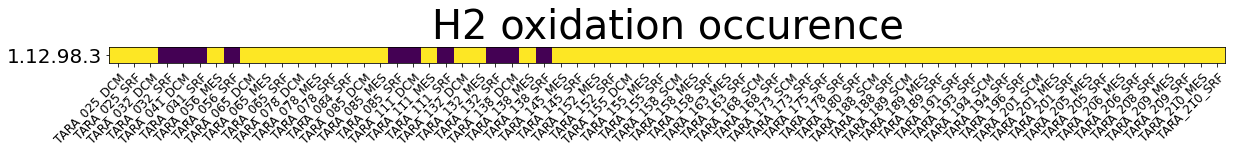

In [31]:
''' We will create an heatmap for the 1.12 EC of the H2 oxidation metabolism, where purple will represent the absence and 
yellow the presence of the gene in the stations. By changing the value in the my_prokkas str we can access all the EC. '''


my_list = df_tab_07.columns.values.tolist()                           # extracting station's name for labels in the heatmap below
my_list.remove('BINID')

heatmatrix = []                                                       # initialize empty list 
my_prokkas = ['1.12.98.3']                                            # value of interest for the for loop below 

for prokka in my_prokkas:                                              
    idx = np.where(unic_prokkas == prokka)[0][0]                      # np.where to get all the elements that match the condition
    station_act = np.array(prok_dict[idx]["STATIONS"])                # to get the element of prok_dikt at the position idx
    station_act = np.sum(station_act, axis=0)                         
    station_act[station_act > 0] = 1                                  
    heatmatrix.append(station_act.astype(np.uint8))                   
heatmatrix = np.array(heatmatrix)                                     

fig, ax = plt.subplots(figsize=(20, 100))                             # to set the dimensions of the plot
im = ax.imshow(heatmatrix)                                          

print(heatmatrix.shape)                                               
print(len(my_list))

ax.set_yticks(np.arange(len(my_prokkas)), labels = my_prokkas, fontsize = 20)     # to set labels and title
ax.set_xticks(np.arange(len(my_list)), labels = my_list, fontsize = 12)                  
ax.set_title("H2 oxidation occurence", fontsize = 40)  

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")   # to rotate and better visualize the stations
plt.show()                                                           



Oxidoreductases are enzymes that catalyzes the transfer of e- from one molecule (reductant) or e- donor to another (oxidant) or e- acceptor.

## CONSIDERAZIONI 

Come sono stati presi i campioni? il dato è normalizzato? Ad esempio: quanti lt di campione vengono raccolti alle diverse profondita? Quanto e rappresentata ogni profondita? Come va inteso il dato quantitativo???

LA STAZIONE 155 (gb) E MOLTO BEN RAPPRESENTATA.

COSA ACCADE ALLA STAZIONE 111??

Geoplot mostra zone con un maggiore numero di EC rispetto ad altre in corrispondenza della fascia equatoriale e zone costiere (NW) dell'oceano Indiano. Prevedibilmente una minore biodiversità associata ad un minore numero di enzyme classes potrebbe rispecchiare la condizione oligonutritiva caratteristica per queste zone (Minimum oxigen zones, regimi climatici, correnti, upwelling, etc.). Creare uno stacked barplot per stazioni ben rappresentate a tutte le profondità? 

Quali enzyme classes sono appannaggio delle alte latitudini? Per quale motivo compaiono? (nb:le zone di campionamento all'equatore corrispondono a zone segnate sulle mappa del tara project come zone con pH acido (Panama, India, Madagascar)).

Resta da capire se la condizione di suddette zone rispecchino effetivamente una penuria di nutrienti o se alcune specie possano prevalere sulle altre andando a ricoprire quantitativamente le nicchie libere... 

EXTREME ENVIRONMENT, why Arctic? why marine sediments? 

concentrare l'analisi sull'Artico? (tra 80 e 60 gradi N / da 158 a 210 stations), ma su che numeri sto lavorando? i.e. 

H2 oxidation è presente in 218 su 529 MAGs (quasi 50%), il che lo rende un gene abbastanza diffuso al punto di poter pensare che la sua assenza nella heatmap sia dovuta ad errori di campionamento? Caratterizzare meglio l'informazione sui 218 H2 ox?

H2 oxidation genes belongs to the oxydoreductase Enzyme class. In the dataset there are three enzymes related to this class. While the first two (1.12.1.2 and 1.12.2.1) are ubiquitous, the third one (1.12.98.1 - Coenzyme F420 hydrogenase) is typical of sediments and anaerobic environments.
The Coenzyme F420 Hydrogenase appears in the UniProtKB database (https://www.uniprot.org/uniprot/P19496) for 4 archaea: Methanosarcina barkero Fusaro strain, Methanothermobacter thermoautotrophicus, Methanococcus voltae, Methanocaldococcus jannaschii.